# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
demo01 = pd.read_csv('demo01.csv')
demo01.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [32]:
demo_df = pd.DataFrame(demo01)
demo_df = demo_df.drop(columns = "tipo_residencia", axis = 1)
replace = ['Y','N']
replace_bool = [1,0]
demo_df['posse_de_veiculo'].replace('Y',1,inplace = True)
demo_df['posse_de_veiculo'].replace('N',0,inplace = True)
demo_df['sexo'].replace('M',1,inplace = True)
demo_df['sexo'].replace('F',0,inplace = True)
demo_df['posse_de_imovel'].replace('Y',1,inplace = True)
demo_df['posse_de_imovel'].replace('N',0,inplace = True)
demo_df.mau = demo_df.mau.astype(int)
demo_df = pd.get_dummies(demo_df, columns = ['tipo_renda','educacao',"estado_civil"], drop_first=True)

demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [33]:
y = demo_df.mau

In [34]:
x = demo_df.drop('mau', axis = 1)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [37]:
clf = DecisionTreeClassifier(random_state = 100)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

[Text(0.6164535990121615, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Mau'),
 Text(0.36714243056174267, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Mau'),
 Text(0.23294843917052743, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Mau'),
 Text(0.06254454739843193, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Mau'),
 Text(0.0481111903064861, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Mau'),
 Text(0.03492516037063435, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Mau'),
 Text(0.017106200997861726, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Mau'),
 Text(0.011404133998574484, 0.7

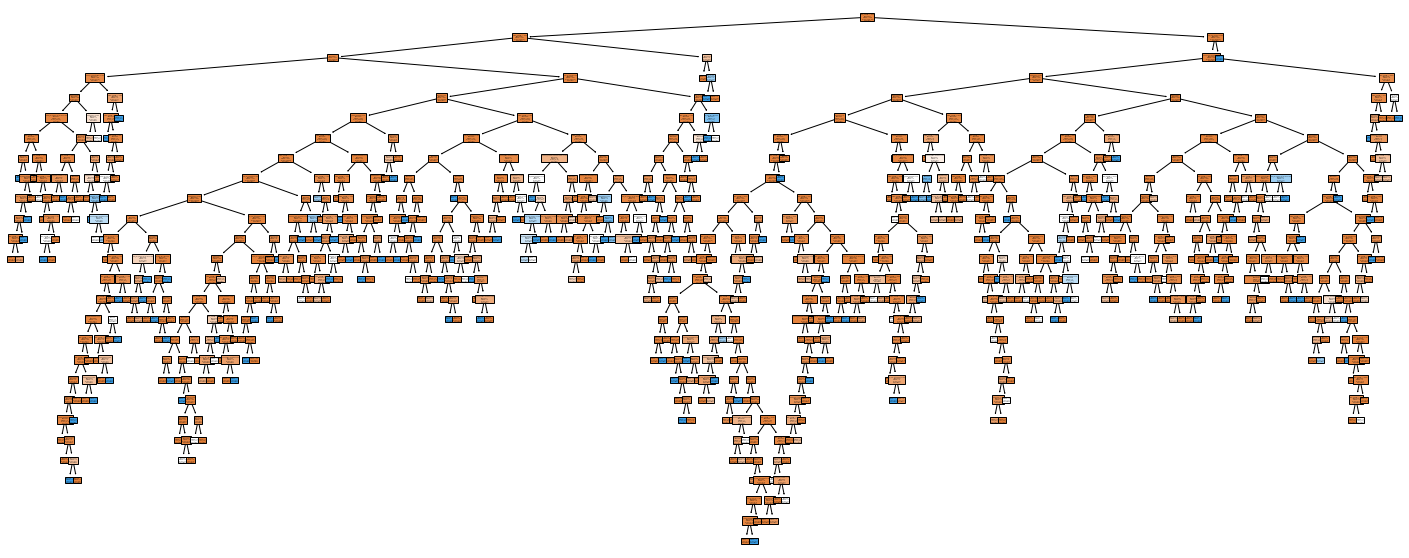

In [38]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names= x.columns)

C:\Users\teste\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


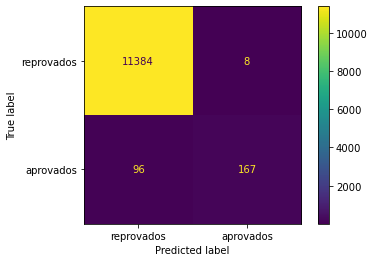

In [40]:
plot_confusion_matrix(clf,x_train,y_train, display_labels = ['reprovados','aprovados'])

In [45]:
y_chapeu_train = clf.predict(x_train)
accuracy_score(y_train,y_chapeu_train)

0.962076362076362

In [41]:
clf = DecisionTreeClassifier(random_state = 100)
clf.fit(x_test,y_test)

DecisionTreeClassifier(random_state=100)

C:\Users\teste\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


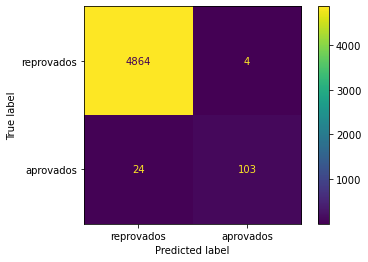

In [42]:
plot_confusion_matrix(clf,x_test,y_test,display_labels = ['reprovados','aprovados'])

In [46]:
y_chapeu_test = clf.predict(x_test)
accuracy_score(y_test,y_chapeu_test)

0.9943943943943944

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [47]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)
clf = clf.fit(x_train,y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.9727727727727727

[Text(0.531965804973822, 0.9545454545454546, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = reprovado'),
 Text(0.23830170157068062, 0.8636363636363636, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = reprovado'),
 Text(0.2330660994764398, 0.7727272727272727, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = reprovado'),
 Text(0.10471204188481675, 0.6818181818181818, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = reprovado'),
 Text(0.06806282722513089, 0.5909090909090909, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = reprovado'),
 Text(0.06282722513089005, 0.5, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = reprovado'),
 Text(0.028795811518324606, 0.4090909090909091, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = reprovado'),
 Text

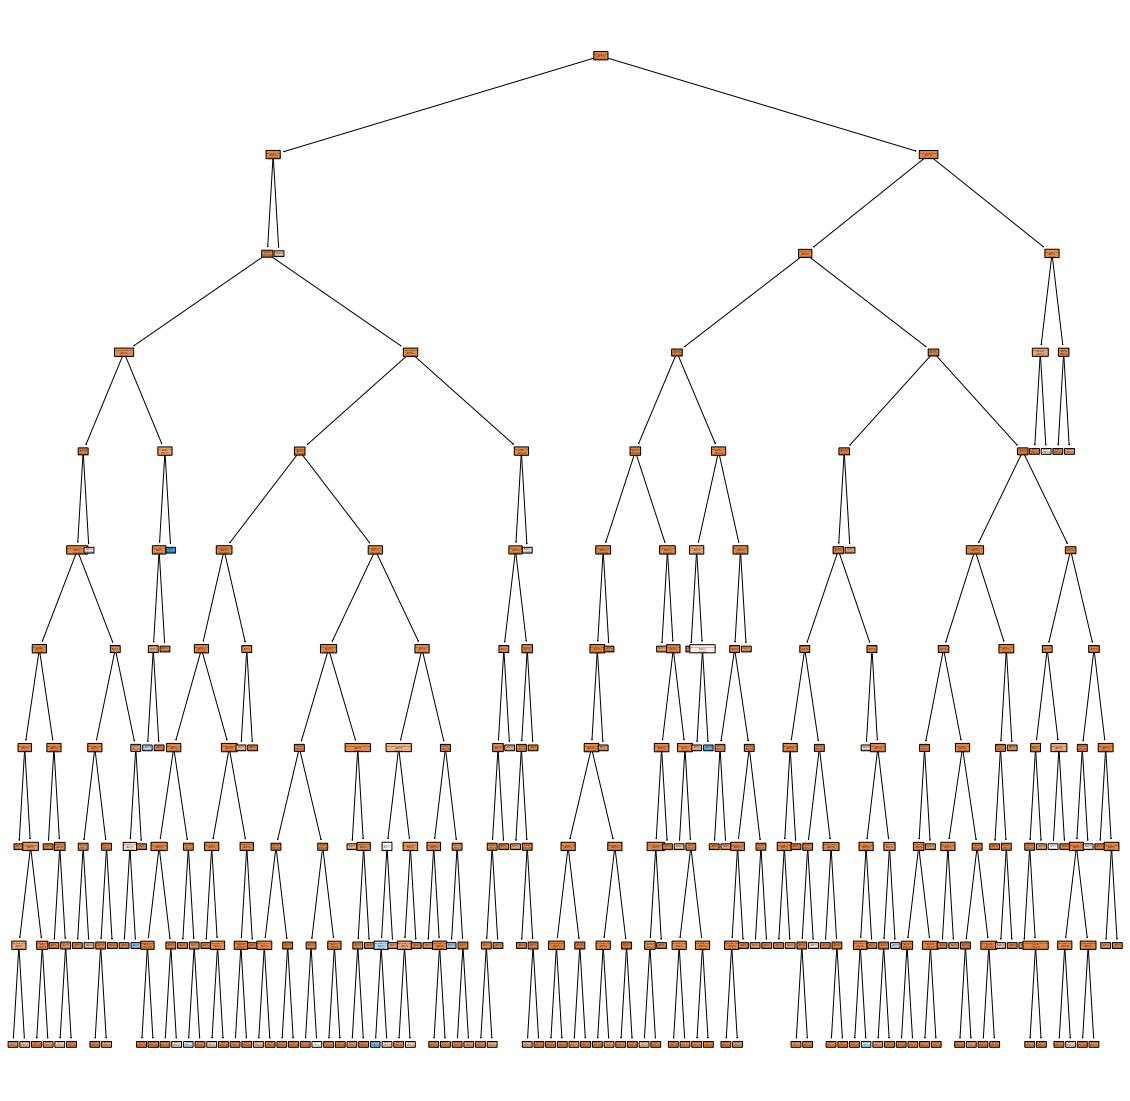

In [48]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['reprovado', 'aprovado'],
         feature_names=x_train.columns)

C:\Users\teste\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


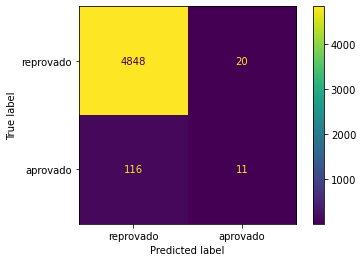

In [49]:
plot_confusion_matrix(clf, x_test, y_test, display_labels=['reprovado', 'aprovado']);